In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import available_events
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
import matplotlib.pyplot as plt
import joblib

EXTRACCION DE DATOS

In [3]:
df = pd.read_csv('mergeVincesnoAtipicos.csv', sep=';', low_memory=False)

In [4]:
df

,Index,_1,Identificador,year,rc_clacul,ct_prepa_suelo,ct_k510ha,ct_k511ha,ct_afecta_prod,ct_riego,...,pq_herb,ct_color_her_pq,pq_ins,ct_color_ins_pq,pq_fun,ct_color_fun_pq,su_plaguicidas,ct_prod,Ventas,Unnamed: 28
0,168,12678,12085002062560003,2018,507,1,0.0706,0.0706,2,1,...,0.5,4,0.5,1,0.5,4,0.0706,0.272727,0.181818,NaN
1,172,12683,12085002062560004,2018,507,1,0.5000,0.5000,2,1,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
2,171,12682,12085002062560004,2018,507,1,0.5000,0.5000,2,1,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
3,170,12681,12085002062560004,2018,507,1,0.5000,0.5000,2,2,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
4,169,12680,12085002062560004,2018,507,1,0.5000,0.5000,3,2,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,163,16815,12085151000993398,2017,507,2,4.9392,4.9392,7,2,...,7.0,3,2.0,4,0.0,0,4.9392,16.838182,16.838182,NaN
475,162,16813,12085151000993398,2017,507,2,9.8784,9.8784,7,2,...,14.0,3,4.0,3,0.0,0,9.8784,33.676364,33.676364,NaN
476,167,16821,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0.0,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN
477,166,16820,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0.0,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN


In [5]:
columnas = ['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                       'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                       'ct_pqui', 'su_plaguicidas','Ventas'] #Ventas / ct_prod en base a lo que se necesite

In [6]:
X = df[columnas]
y = df['ct_prod']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ENTRENAMIENTO DEL MODELO

In [7]:
# Definicion de hiperparametros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [8]:
# modelo de RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

In [9]:
#GridSearchCV para la obtencion de los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Obtencion de los mejores hiperparametros
best_params = grid_search.best_params_
print("Hiperparámetros óptimos:", best_params)

Hiperparámetros óptimos: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [10]:
# modelo de RandomForestRegressor pasando los mejores hiperparámetros
best_rf_model = RandomForestRegressor(random_state=42, **best_params)

# Entrenanamiento del modelo
best_rf_model.fit(X_train, y_train)

# predicciones con los datos de testing
y_pred = best_rf_model.predict(X_test)

# Precision del modelo
accuracy = best_rf_model.score(X_test, y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9522245286848184


PRUEBAS DEL MODELO

In [11]:
#Valor de produccion del dataset vs el valor de prediccion del modelo
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
93,19.544318,20.220198
320,1.890000,2.501646
55,9.000000,8.814360
30,12.000000,9.197003
449,3.818182,3.812192
...,...,...
249,3.340909,3.722041
393,2.835000,3.591947
425,0.681818,0.539676
42,12.545455,11.795093


In [12]:
r2 = r2_score(y_test, y_pred)
print("Precisión (R^2):", r2)

Precisión (R^2): 0.9522245286848184


ALMACENAMIENTO DEL MODELO

In [13]:
# Almacendamiento del modelo
hdf5_file = "random_forest_model.h5"
joblib.dump(best_rf_model, hdf5_file)
print("El modelo se ha guardado correctamente")

El modelo se ha guardado correctamente


In [14]:
# Cargar el modelo para ser utlizado
hdf5_file = "random_forest_model.h5"
rf_model = joblib.load(hdf5_file)

MEJOR ARBOL

In [15]:
# Obténcion de las caracteristicas del modelo
feature_importances = rf_model.feature_importances_

# Obtencion del indice con respecto a la caracteristica mas importante
best_feature_index = np.argmax(feature_importances)

# Mejor árbol relacionado a la característica más importante
tree = rf_model.estimators_[best_feature_index]


In [16]:
!pip install graphviz


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
feature_names = X_train.columns.tolist()
tree = best_rf_model.estimators_[0]

# Exporta el árbol en formato DOT
dot_data = export_graphviz(tree, out_file=None,feature_names= feature_names,
                           filled=True, rounded=True)

# Crea un objeto de gráfico a partir de los datos DOT
graph = graphviz.Source(dot_data)

# Muestra el gráfico del árbol
graph.view()


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

GRAFICOS

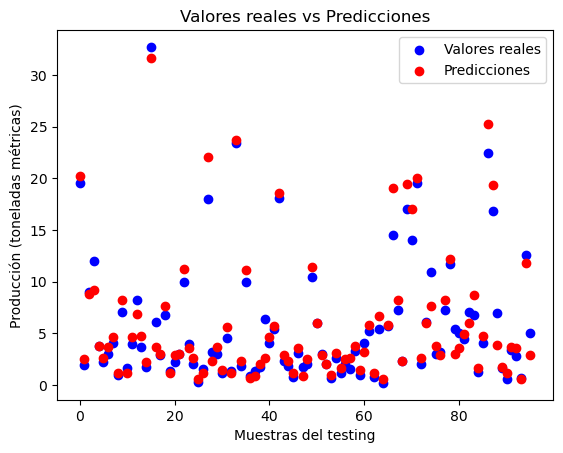

96


In [18]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.scatter(range(len(y_test)), y_test, c='blue', label='Valores reales')
plt.scatter(range(len(y_pred)), y_pred, c='red', label='Predicciones')
plt.xlabel('Muestras del testing')
plt.ylabel('Producción (toneladas métricas)')
plt.title('Valores reales vs Predicciones')
plt.legend()
plt.show()
print(len(y_pred))



In [19]:
import pandas as pd
import joblib
from sklearn.metrics import r2_score

# Cargar el modelo RandomForestRegressor entrenado
hdf5_file = "random_forest_model.h5"
rf_model = joblib.load(hdf5_file)

# Datos para hacer predicciones (reemplaza estos valores con tus datos)
nuevos_datos_dict = {
    'ct_prepa_suelo': [1],
    'ct_k510ha': [5],
    'ct_k511ha': [5],
    'ct_afecta_prod': [7],
    'ct_riego': [2],
    'su_fertilizada': [5],
    'ct_fqui': [1],
    'ct_fqui_npk': [1102.3],
    'ct_pqui': [1],
    'su_plaguicidas': [5],
    'Ventas': [19.54431818]
}
y1 = [19.54431818]

# Crear un DataFrame con los nuevos datos
nuevos_datos = pd.DataFrame(nuevos_datos_dict)

# Realizar las predicciones
predicciones = rf_model.predict(nuevos_datos)

# Imprimir las predicciones
print("La prediccion es:", predicciones)

# No se necesita calcular el R2 ya que no tenemos etiquetas verdaderas para comparar.
# El R2 se utiliza para evaluar el rendimiento del modelo en comparación con los valores verdaderos.
# Calcular el R2 score
r2 = r2_score(y1, predicciones)
print("R2 Score:", r2)


La prediccion es: [19.7838064]
R2 Score: nan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [20]:
#Esta tabla muestra el valor de produccion del dataset vs el valor que el modelo predijo cuando se le pasaron los otros parametros del dataset
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
93,19.544318,20.220198
320,1.890000,2.501646
55,9.000000,8.814360
30,12.000000,9.197003
449,3.818182,3.812192
...,...,...
249,3.340909,3.722041
393,2.835000,3.591947
425,0.681818,0.539676
42,12.545455,11.795093
